memberdict=tree.all_members
print(memberdict)

keylist=tree.keys()
print(keylist)

In [1]:
%run "00_predef.ipynb"

In [2]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import os
import time

start_time = time.time()

file = uproot.open("/home/fdolek/work/data/baseline_35.root")
tree = file["ntuple_sig"]

# Read all branches at once
all_data = tree.arrays()

# Convert awkward arrays to numpy arrays and store them in a list
all_arrays = [ak.to_numpy(all_data[branch]) for branch in tree.keys()]

# Stack arrays horizontally
all_arrays_stacked = np.vstack(all_arrays)

end_time = time.time()
elapsed_time = end_time - start_time

print("Shape of allArrays:", all_arrays_stacked.shape)
print("Time taken to read and concatenate the data: {:.2f} seconds".format(elapsed_time))



Shape of allArrays: (71, 2000)
Time taken to read and concatenate the data: 0.06 seconds


In [3]:
smodule= all_arrays_stacked[64]

NameError: name 'stime_16ns_low' is not defined

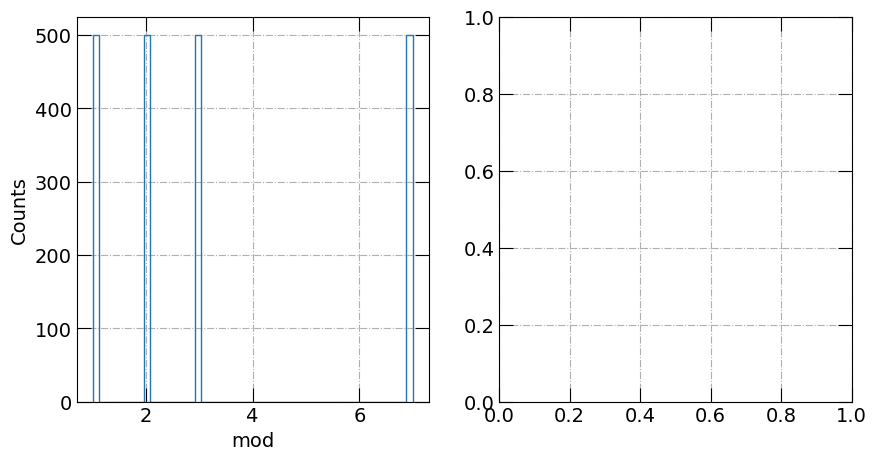

In [4]:
import matplotlib.pyplot as plt

# create a grid of subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
# plot the first histogram in the first subplot
ax1.hist(smodule, bins=50, histtype="step", log=False)
ax1.set_xlabel('mod')
ax1.set_ylabel('Counts')

# plot the second histogram in the second subplot
ax2.hist(stime_16ns_low, bins=50, histtype="step", log=False)
ax2.set_xlabel('Time (Low_16ns)')
ax2.set_ylabel('Counts')
ax2.set_yscale('log')

# adjust the layout of the subplots
plt.tight_layout()

# display the plot
plt.show()

/home/fdolek/work/data/baseline_35.root


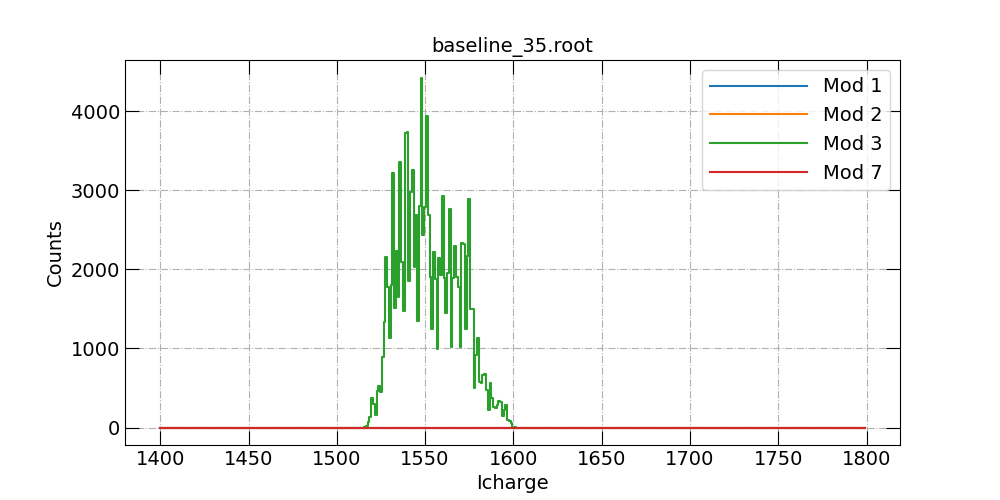

In [23]:
%matplotlib widget

import os
import uproot
import awkward as ak
import numpy as np
import re
# Define the path to the directory containing the ROOT files
data_dir = '/home/fdolek/work/data/'

# Get a list of all ROOT files in the directory
root_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.root')]

# Process all files or just a single file
process_all_files = False
single_file_name = 'baseline_35.root'

for root_file in root_files:
    if not process_all_files and os.path.basename(root_file) != single_file_name:
        continue
    print(root_file)    
    ###################### Your code here##################################
    
    all_arrays = []
    file = uproot.open(root_file)
    tree = file["ntuple_sig"]
    all_data = tree.arrays()
    all_arrays += [ak.to_numpy(all_data[branch]) for branch in tree.keys()]

    # Stack arrays horizontally
    all_arrays_stacked = np.vstack(all_arrays)

    smodule= all_arrays_stacked[64]
    stype= all_arrays_stacked[65]
    slen= all_arrays_stacked[66]
    stime_sec_high= all_arrays_stacked[67]
    stime_sec_low= all_arrays_stacked[68]
    stime_16ns_high= all_arrays_stacked[69]
    stime_16ns_low= all_arrays_stacked[70]
    channels=all_arrays_stacked[:64]
    
    low100 = stime_16ns_low <= 10
    mid2000 = (stime_16ns_low >= 10) & (stime_16ns_low <= 2000)
    high2000 = stime_16ns_low > 2000
    
    mod1 = smodule == 1
    mod2 = smodule == 2
    mod3 = smodule == 3
    mod7 = smodule == 7

    def plot_histograms(channels, mod_masks, bin_range, bin_width, title):
        fig, ax = plt.subplots()
        fig.set_size_inches(10, 5)

        for i, mod_mask in enumerate(mod_masks):
            hist, bin_edges = np.histogram(channels[:, mod_mask[0] & high2000 ].flatten(), bins=int((bin_range[1]-bin_range[0])/bin_width), range=bin_range)
            
            plt.step(bin_edges[:-1], hist, where='mid', label=mod_labels[i])
        
        
        plt.xlabel('Icharge')
        plt.ylabel('Counts')
        #ax.set_yscale('log')
        plt.title(title)
        plt.legend()
        plt.show()
    
    # Define the modulation masks and labels
    mod_masks = [mod1, mod2, mod3, mod7]
    mod_labels = ['Mod 1', 'Mod 2', 'Mod 3', 'Mod 7']

    # Define the bin range and width
    #bin_range = (1000, 4000)
    #bin_width = 10
    bin_range = (1400, 1800)
    bin_width = 1

    # Set the title of the plot to the file name
    title = os.path.basename(root_file)

    # Plot the histograms
    plot_histograms(channels, mod_masks, bin_range, bin_width, title)

    

/home/fdolek/work/data/1681237974_35.root


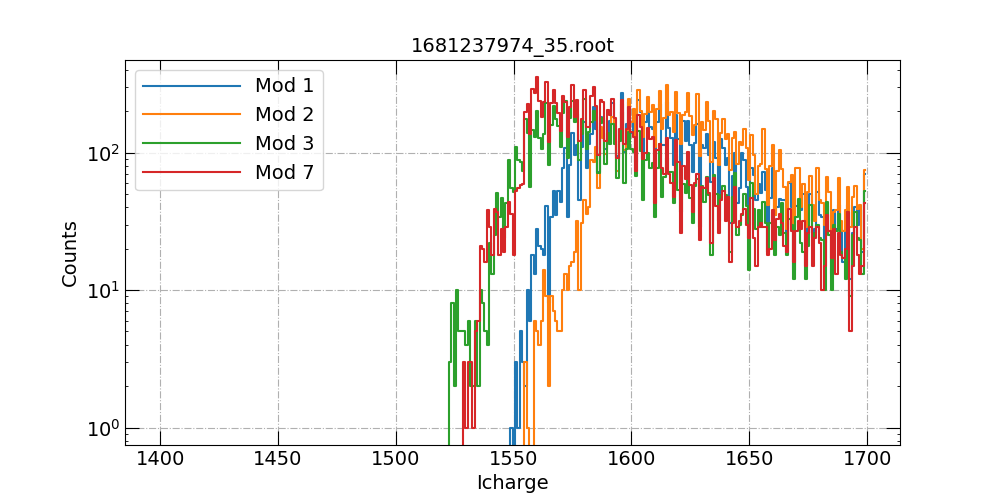

In [14]:
%matplotlib widget

import os
import uproot
import awkward as ak
import numpy as np
import re
# Define the path to the directory containing the ROOT files
data_dir = '/home/fdolek/work/data/'

# Get a list of all ROOT files in the directory
root_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.root')]

# Process all files or just a single file
process_all_files = False
single_file_name = '1681237974_35.root'

for root_file in root_files:
    if not process_all_files and os.path.basename(root_file) != single_file_name:
        continue
    print(root_file)    
    ###################### Your code here##################################
    
    all_arrays = []
    file = uproot.open(root_file)
    tree = file["ntuple_sig"]
    all_data = tree.arrays()
    all_arrays += [ak.to_numpy(all_data[branch]) for branch in tree.keys()]

    # Stack arrays horizontally
    all_arrays_stacked = np.vstack(all_arrays)

    smodule= all_arrays_stacked[64]
    stype= all_arrays_stacked[65]
    slen= all_arrays_stacked[66]
    stime_sec_high= all_arrays_stacked[67]
    stime_sec_low= all_arrays_stacked[68]
    stime_16ns_high= all_arrays_stacked[69]
    stime_16ns_low= all_arrays_stacked[70]
    channels=all_arrays_stacked[:64]
    
    low100 = stime_16ns_low <= 10
    mid2000 = (stime_16ns_low >= 10) & (stime_16ns_low <= 2000)
    high2000 = stime_16ns_low > 2000
    
    mod1 = smodule == 1
    mod2 = smodule == 2
    mod3 = smodule == 3
    mod7 = smodule == 7

    def plot_histograms(channels, mod_masks, bin_range, bin_width, title):
        fig, ax = plt.subplots()
        fig.set_size_inches(10, 5)

        for i, mod_mask in enumerate(mod_masks):
            hist, bin_edges = np.histogram(channels[:, mod_mask & high2000 ].flatten(), bins=int((bin_range[1]-bin_range[0])/bin_width), range=bin_range)

            plt.step(bin_edges[:-1], hist, where='mid', label=mod_labels[i])
        
        
        plt.xlabel('Icharge')
        plt.ylabel('Counts')
        ax.set_yscale('log')
        plt.title(title)
        plt.legend()
        plt.show()
    
    # Define the modulation masks and labels
    mod_masks = [mod1, mod2, mod3, mod7]
    mod_labels = ['Mod 1', 'Mod 2', 'Mod 3', 'Mod 7']

    # Define the bin range and width
    #bin_range = (1000, 4000)
    #bin_width = 10
    bin_range = (1400, 1700)
    bin_width = 1

    # Set the title of the plot to the file name
    title = os.path.basename(root_file)

    # Plot the histograms
    plot_histograms(channels, mod_masks, bin_range, bin_width, title)

    

In [ ]:
channels.size/64

/home/fdolek/work/data/1681238274_35.root


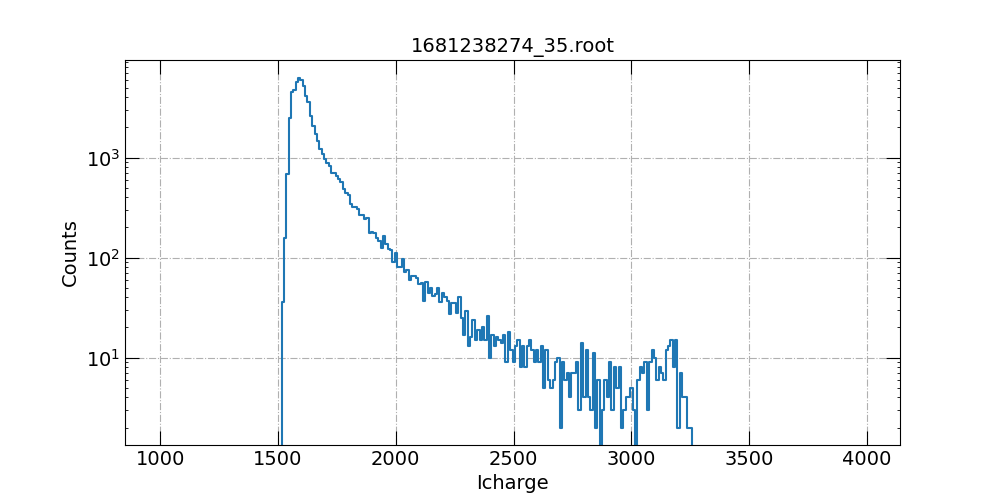

In [17]:
import os
import uproot
import awkward as ak
import numpy as np
import re
import matplotlib.pyplot as plt

# Define the path to the directory containing the ROOT files
data_dir = '/home/fdolek/work/data/'

# Get a list of all ROOT files in the directory
root_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.root')]

# Process all files or just a single file
process_all_files = False
single_file_name = '1681238274_35.root'

for root_file in root_files:
    if not process_all_files and os.path.basename(root_file) != single_file_name:
        continue
    print(root_file)    
    
    ###################### Your code here##################################
    
    all_arrays = []
    file = uproot.open(root_file)
    tree = file["ntuple_sig"]
    all_data = tree.arrays()
    all_arrays += [ak.to_numpy(all_data[branch]) for branch in tree.keys()]

    # Stack arrays horizontally
    all_arrays_stacked = np.vstack(all_arrays)

    smodule= all_arrays_stacked[64]
    stype= all_arrays_stacked[65]
    slen= all_arrays_stacked[66]
    stime_sec_high= all_arrays_stacked[67]
    stime_sec_low= all_arrays_stacked[68]
    stime_16ns_high= all_arrays_stacked[69]
    stime_16ns_low= all_arrays_stacked[70]
    channels=all_arrays_stacked[:64]
    
    low100 = stime_16ns_low <= 10
    mid2000 = (stime_16ns_low >= 10) & (stime_16ns_low <= 2000)
    high2000 = stime_16ns_low > 2000
    
    mod1 = smodule == 1
    mod2 = smodule == 2
    mod3 = smodule == 3
    mod7 = smodule == 7
    
    mod_combined = np.logical_or.reduce([mod1, mod2, mod3, mod7])

    def plot_histogram(channels, mod_mask, bin_range, bin_width, title):
        fig, ax = plt.subplots()
        fig.set_size_inches(10, 5)

        hist, bin_edges = np.histogram(channels[:, mod_mask & high2000 ].flatten(), bins=int((bin_range[1]-bin_range[0])/bin_width), range=bin_range)
        
        plt.step(bin_edges[:-1], hist, where='mid')

        plt.xlabel('Icharge')
        plt.ylabel('Counts')
        ax.set_yscale('log')
        plt.title(title)
        plt.show()

    # Define the bin range and width
    bin_range = (1000, 4000)
    bin_width = 10

    # Set the title of the plot to the file name
    title = os.path.basename(root_file)

    # Plot the histogram
    plot_histogram(channels, mod_combined, bin_range, bin_width, title)


In [ ]:
fig, ax = plt.subplots()

ax.hist(stime_16ns_low, bins=5000, histtype="step", log=False)
ax.set_xlabel('Time (Low_16ns)')
ax.set_ylabel('Counts')
ax.set_yscale('log')

# adjust the layout of the subplots
plt.tight_layout()

# display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# create a grid of subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
# plot the first histogram in the first subplot
ax1.hist(smodule, bins=50, histtype="step", log=False)
ax1.set_xlabel('mod')
ax1.set_ylabel('Counts')

# plot the second histogram in the second subplot
ax2.hist(stime_16ns_low, bins=50, histtype="step", log=False)
ax2.set_xlabel('Time (Low_16ns)')
ax2.set_ylabel('Counts')
ax2.set_yscale('log')

# adjust the layout of the subplots
plt.tight_layout()

# display the plot
plt.show()

In [ ]:
wf.shape

In [ ]:

low100 = stime_16ns_low <= 1
wf=channels[:, mod7 & low100 ]
print(wf.shape)
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm

%matplotlib widget

modules = [mod1, mod2, mod3, mod7]
module_labels = ['Mod 1', 'Mod 2', 'Mod 3', 'Mod 7']
module_index = 0 # Set this to the desired module index (0-3)

wf = channels[:, modules[module_index] & low100]

for i in range(wf.shape[1]):
    fig, ax = plt.subplots()
    matrix = wf[:, i].reshape(8, 8)
    im = ax.imshow(matrix, origin='lower', aspect='auto', norm=LogNorm(vmin=1000, vmax=2000), extent=[0, 8, 0, 8])
    im.set_cmap('jet')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", "3%", pad="2%")
    cb = plt.colorbar(im, cax=cax)
    fig.set_size_inches(8, 8)
    ax.set_xlabel("X", fontsize=10)
    ax.set_ylabel("Y", fontsize=10)
    cb.set_label("Charge", fontsize=10)
    title = f"{module_labels[module_index]}, Index {i}"
    ax.set_title(title, fontsize=10)
    plt.show()
